In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from datetime import datetime
from pandas import Series
from numpy import log

In [2]:
df = pd.read_csv('E:\\LEARNBAY\\Time Series\\AirPassenger.csv',parse_dates=['Year-Month'])
df.head(2)

,Year-Month,Pax
0,1949-01-01,112
1,1949-02-01,118


In [3]:
df.isnull().sum()

Year-Month    0
Pax           0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Year-Month  144 non-null    datetime64[ns]
 1   Pax         144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [6]:
df.set_index(['Year-Month'],inplace=True)
df.head()

,Pax
Year-Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


# Data Visualization

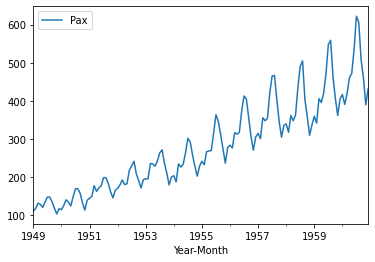

In [7]:
df.plot()
plt.show()

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm

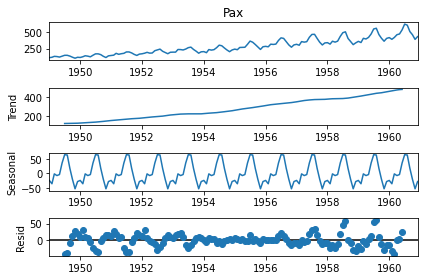

In [10]:
decompose = seasonal_decompose(df['Pax'],model='additive',period=None)
decompose.plot()
plt.show()

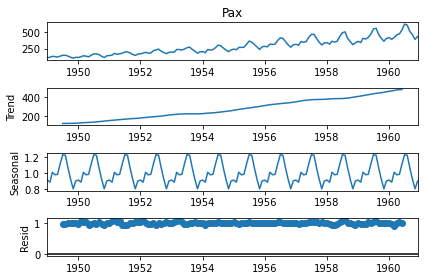

In [11]:
decompose_mul = seasonal_decompose(df['Pax'], model='multiplicative',period=None)
decompose_mul.plot()
plt.show()

###### Model should be additive.

# Durbin Watson Test

In [13]:
sm.stats.durbin_watson(df['Pax'])

0.0121527966037621

This data is good for time series forecasting. 

This data will give veyr bad result in the linear regression. 

## Augumented Dickey Fuller Test -- 
##### To check whether the dataset is stationay or non-stationary..

just tesitng if null/alternate hypothesis is accpeted. 

In [14]:
adfuller(df['Pax'])

(0.8153688792060463,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

(0.8153688792060463 --- Stats value adf test
 0.991880243437641 ----- p-value
 13 -------------------- not to worry about this
 130 ------------------- not to worry about this
 {'1%': -3.4816817173418295 - not to worry about this
  '5%': -2.8840418343195267 - not to worry about this
  '10%': -2.578770059171598} - not to worry about this
 996.692930839019) - not to worry about this

In [19]:
def adf_check(timeseries):
    result = adfuller(timeseries)
    print("Augumented Dickey Fuller Test : TO find data is stationary or non-stationary\n")
    
    labels = ['ADF Stats Test','p-Values','#Lags','No. of Observations']
    for i,j in zip(result,labels):
        print( j +" = "+str(i))
        
    if result[1] <= 0.05:
        print("\nStrong Evidence evidence against null hypothesis then the dataset is stationary")
    else:
        print("\nWeak Evidence against null hypothesis that means dataset is non-statioary")
            

In [20]:
adf_check(df['Pax'])

Augumented Dickey Fuller Test : TO find data is stationary or non-stationary

ADF Stats Test = 0.8153688792060463
p-Values = 0.991880243437641
#Lags = 13
No. of Observations = 130

Weak Evidence against null hypothesis that means dataset is non-statioary


# Data is non-stationary. 


## For Trend

In [28]:
df['1st Diff'] = df['Pax'] -df['Pax'].shift(1)
df.head()

,Pax,1st Diff,2nd Diff
Year-Month,,,
1949-02-01,118,NaN,NaN
1949-03-01,132,14.0,8.0
1949-04-01,129,-3.0,-17.0
1949-05-01,121,-8.0,-5.0
1949-06-01,135,14.0,22.0


In [29]:
adf_check(df['1st Diff'].dropna())  # doesn't work with null data and one data is null. Hence, deleting that. 

Augumented Dickey Fuller Test : TO find data is stationary or non-stationary

ADF Stats Test = -2.8334256455653213
p-Values = 0.05365549915890938
#Lags = 12
No. of Observations = 129

Weak Evidence against null hypothesis that means dataset is non-statioary


It is still not stationary. So, we can actually do another lag function. 

In [30]:
df['2nd Diff'] = df['1st Diff'] - df['1st Diff'].shift(1)
df.head()

,Pax,1st Diff,2nd Diff
Year-Month,,,
1949-02-01,118,NaN,NaN
1949-03-01,132,14.0,NaN
1949-04-01,129,-3.0,-17.0
1949-05-01,121,-8.0,-5.0
1949-06-01,135,14.0,22.0


In [31]:
adf_check(df['2nd Diff'].dropna())

Augumented Dickey Fuller Test : TO find data is stationary or non-stationary

ADF Stats Test = -16.31303255610567
p-Values = 3.182121099054364e-29
#Lags = 11
No. of Observations = 129

Strong Evidence evidence against null hypothesis then the dataset is stationary


# Now, the dataset is stationary.

AR - p :: Partial Autocorrelation
I - d :: Difference (AUgumented Dickey Fuller test)
MA - q :: Autocorrelation
        
AIC = Akaike Information Criterion = -LL + parameters

parameters == pqd for trend
           == PQD for seasonality
    
    
P = ?
d = 2  #Number of stationary lags. 
q = ?

# SEASONALITY 

In [33]:
df['Seasonality'] = df['Pax'] - df['Pax'].shift(12)
df.head(15)

,Pax,1st Diff,2nd Diff,Seasonality
Year-Month,,,,
1949-02-01,118,NaN,NaN,NaN
1949-03-01,132,14.0,NaN,NaN
1949-04-01,129,-3.0,-17.0,NaN
1949-05-01,121,-8.0,-5.0,NaN
1949-06-01,135,14.0,22.0,NaN
1949-07-01,148,13.0,-1.0,NaN
1949-08-01,148,0.0,-13.0,NaN
1949-09-01,136,-12.0,-12.0,NaN
1949-10-01,119,-17.0,-5.0,NaN


In [34]:
adf_check(df['Seasonality'].dropna())

Augumented Dickey Fuller Test : TO find data is stationary or non-stationary

ADF Stats Test = -3.375189099719881
p-Values = 0.011834318115889409
#Lags = 1
No. of Observations = 129

Strong Evidence evidence against null hypothesis then the dataset is stationary


In [ ]:
So, we got stationary data in just 1 lag. 

P=?
D=1
Q=?

 We need to find the p and q. For that we use the process of graphical representation to find out the numbers. 

In [36]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

acf - auto correlation function
pacf = partial autocorrelation function

In [37]:
df.head(1)

,Pax,1st Diff,2nd Diff,Seasonality
Year-Month,,,,
1949-02-01,118,NaN,NaN,NaN


# TREND - p and q calculation

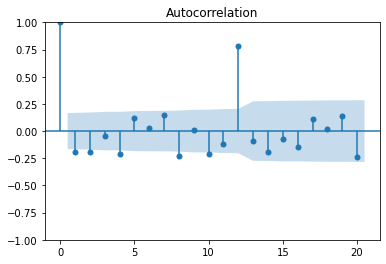

In [41]:
plot_acf(df['2nd Diff'].dropna(),lags=20)
plt.show()

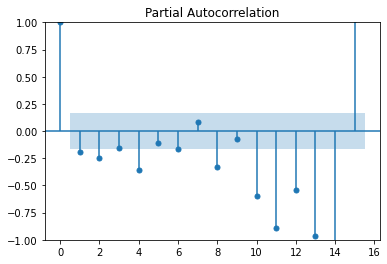

In [42]:
plot_pacf(df['2nd Diff'].dropna(),lags=15)
plt.show()

In [ ]:
p = 4
d = 2
q = 2

# SEASONALITY - PQD Values

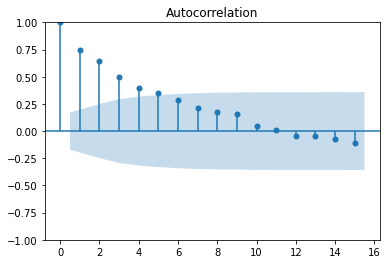

In [45]:
plot_acf(df['Seasonality'].dropna(),lags=15)
plt.show()

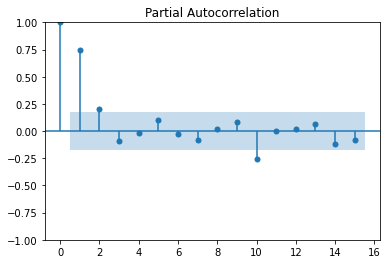

In [47]:
plot_pacf(df['Seasonality'].dropna(),lags=15)
plt.show()

In [ ]:
P = 2
D = 1
Q = 5

## Trend Parameters
p = 4
d = 2
q = 2

## Seasonal Parameters
P = 2
D = 1
Q = 5

# ARIMA MODEL

In [57]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [59]:
df.head(1)

,Pax,1st Diff,2nd Diff,Seasonality
Year-Month,,,,
1949-02-01,118,NaN,NaN,NaN


In [60]:
model = sm.tsa.statespace.SARIMAX(df['Pax'],order=(4,2,2), seasonal_order=(2,1,5,12))

C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [62]:
result = model.fit()
result.summary()

C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                            SARIMAX Results                                             
========================================================================================================
Dep. Variable:                                              Pax   No. Observations:                  143
Model:             SARIMAX(4, 2, 2)x(2, 1, [1, 2, 3, 4, 5], 12)   Log Likelihood                -493.698
Date:                                          Thu, 03 Aug 2023   AIC                           1015.397
Time:                                                  10:38:25   BIC                           1055.434
Sample:                                              02-01-1949   HQIC                          1031.665
                                                   - 12-01-1960                                         
Covariance Type:                                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3421      0.094    -14.338      0.000      -1.526      -1.159
ar.L2         -0.4582      0.144     -3.176      0.001      -0.741      -0.175
ar.L3         -0.1184      0.191     -0.621      0.535      -0.492       0.255
ar.L4         -0.0817      0.101     -0.806      0.420      -0.281       0.117
ma.L1         -0.0067      7.800     -0.001      0.999     -15.294      15.280
ma.L2         -0.9933      7.756     -0.128      0.898     -16.194      14.207
ar.S.L12       0.5400    426.906      0.001      0.999    -836.181     837.261
ar.S.L24       0.3943    407.312      0.001      0.999    -797.923     798.711
ma.S.L12      -0.7858    426.860     -0.002      0.999    -837.416     835.844
ma.S.L24      -0.1429    512.263     -0.000      1.000   -1004.160    1003.874
ma.S.L36       0.0218    150.775      0.000      1.000    -295.492     295.536
ma.S.L48       0.0857     53.079      0.002      0.999    -103.948     104.119
ma.S.L60       0.0572     58.516      0.001      0.999    -114.632     114.747
sigma2       110.1432    858.981      0.128      0.898   -1573.428    1793.714
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                11.53
Prob(Q):                              0.79   Prob(JB):                         0.00
Heteroskedasticity (H):               2.77   Skew:                             0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# AIC = 1015.397   ::  Seasonal_order = (2, 1, 5, 12)
# AIC =  1015.397  ::  Seasonal_order = (2, 1, 4, 12)
# AIC =    ::  Seasonal_order = (2, 1, 3, 12)
# AIC =    ::  Seasonal_order = (2, 1, 2, 12)
# AIC =    ::  Seasonal_order = (2, 1, 1, 12)

In [68]:
for i in range(1,5):
    model1=sm.tsa.statespace.SARIMAX(df['Pax'],order=(4,2,2),seasonal_order=(2,1,i,12))
    result = model1.fit()
    print("**********for i =",i,"*****seasonal_order =",(2,1,i,12)," ************")
    print(result.summary())

C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


**********for i = 1 *****seasonal_order = (2, 1, 1, 12)  ************
                                      SARIMAX Results                                       
Dep. Variable:                                  Pax   No. Observations:                  143
Model:             SARIMAX(4, 2, 2)x(2, 1, [1], 12)   Log Likelihood                -494.347
Date:                              Thu, 03 Aug 2023   AIC                           1008.695
Time:                                      11:10:07   BIC                           1037.293
Sample:                                  02-01-1949   HQIC                          1020.315
                                       - 12-01-1960                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3596      0

C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


**********for i = 2 *****seasonal_order = (2, 1, 2, 12)  ************
                                     SARIMAX Results                                      
Dep. Variable:                                Pax   No. Observations:                  143
Model:             SARIMAX(4, 2, 2)x(2, 1, 2, 12)   Log Likelihood                -494.362
Date:                            Thu, 03 Aug 2023   AIC                           1010.723
Time:                                    11:10:11   BIC                           1042.181
Sample:                                02-01-1949   HQIC                          1023.505
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3527      0.094    -14.397 

C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


**********for i = 3 *****seasonal_order = (2, 1, 3, 12)  ************
                                         SARIMAX Results                                          
Dep. Variable:                                        Pax   No. Observations:                  143
Model:             SARIMAX(4, 2, 2)x(2, 1, [1, 2, 3], 12)   Log Likelihood                -493.658
Date:                                    Thu, 03 Aug 2023   AIC                           1011.316
Time:                                            11:10:17   BIC                           1045.633
Sample:                                        02-01-1949   HQIC                          1025.260
                                             - 12-01-1960                                         
Covariance Type:                                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------

C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


**********for i = 4 *****seasonal_order = (2, 1, 4, 12)  ************
                                           SARIMAX Results                                           
Dep. Variable:                                           Pax   No. Observations:                  143
Model:             SARIMAX(4, 2, 2)x(2, 1, [1, 2, 3, 4], 12)   Log Likelihood                -493.520
Date:                                       Thu, 03 Aug 2023   AIC                           1013.040
Time:                                               11:10:25   BIC                           1050.218
Sample:                                           02-01-1949   HQIC                          1028.146
                                                - 12-01-1960                                         
Covariance Type:                                         opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------

In [ ]:
# Lesser the Akaike Information Criterion (AIC value) --- better the model. 
# AIC = 1015.397   ::  Seasonal_order = (2, 1, 5, 12)
# AIC = 1013.040   ::  Seasonal_order = (2, 1, 4, 12)
# AIC = 1011.316   ::  Seasonal_order = (2, 1, 3, 12)
# AIC = 1010.723  ::  Seasonal_order = (2, 1, 2, 12)
# AIC = 1008.695  ::  Seasonal_order = (2, 1, 1, 12) ----BEST

In [69]:
df.tail()

,Pax,1st Diff,2nd Diff,Seasonality
Year-Month,,,,
1960-08-01,606,-16.0,-103.0,47.0
1960-09-01,508,-98.0,-82.0,45.0
1960-10-01,461,-47.0,51.0,54.0
1960-11-01,390,-71.0,-24.0,28.0
1960-12-01,432,42.0,113.0,27.0


# Ask is - Predict 1961 - 1965


In [70]:
len(df)

143

<AxesSubplot:xlabel='Year-Month'>

<Figure size 864x864 with 0 Axes>

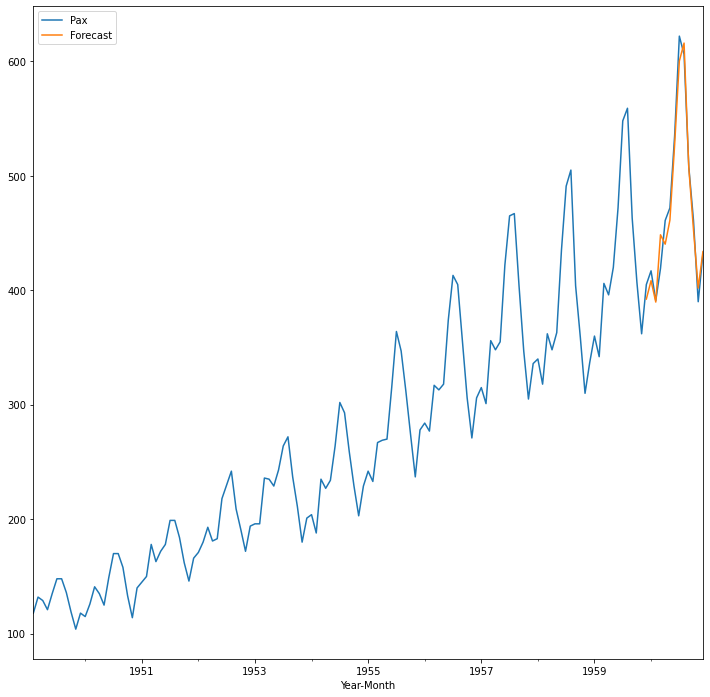

In [81]:
# Validating the model

df['Forecast'] = result.predict(start=130,end=144,dynamic=True)
plt.figure(figsize=(12,12))
df[['Pax','Forecast']].plot()

C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<AxesSubplot:xlabel='Year-Month'>

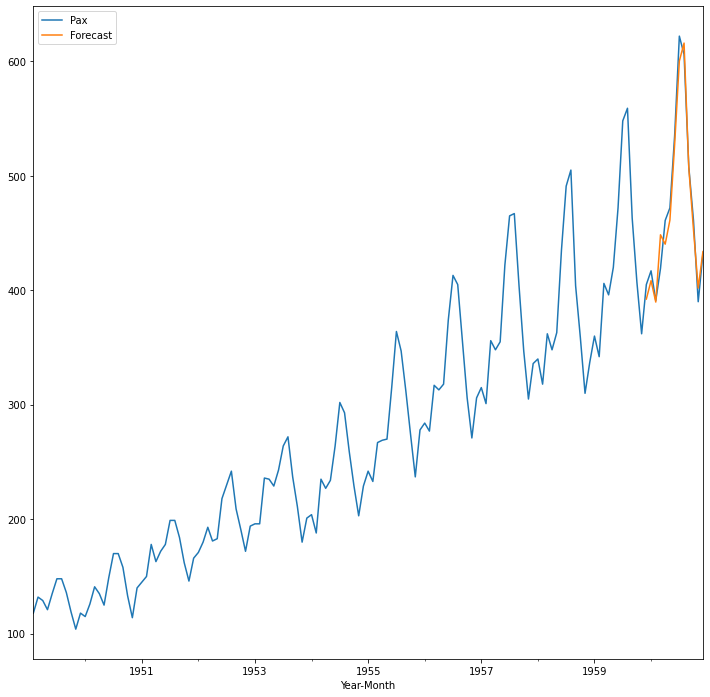

In [80]:
model1=sm.tsa.statespace.SARIMAX(df['Pax'],order=(4,2,2),seasonal_order=(2,1,1,12))
result = model1.fit()

df['Forecast'] = result.predict(start=130,end=144,dynamic=True)
# plt.figure(figsize=(12,12))
from pylab import rcParams
rcParams['figure.figsize'] =(12,12)
df[['Pax','Forecast']].plot()

C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<AxesSubplot:xlabel='Year-Month'>

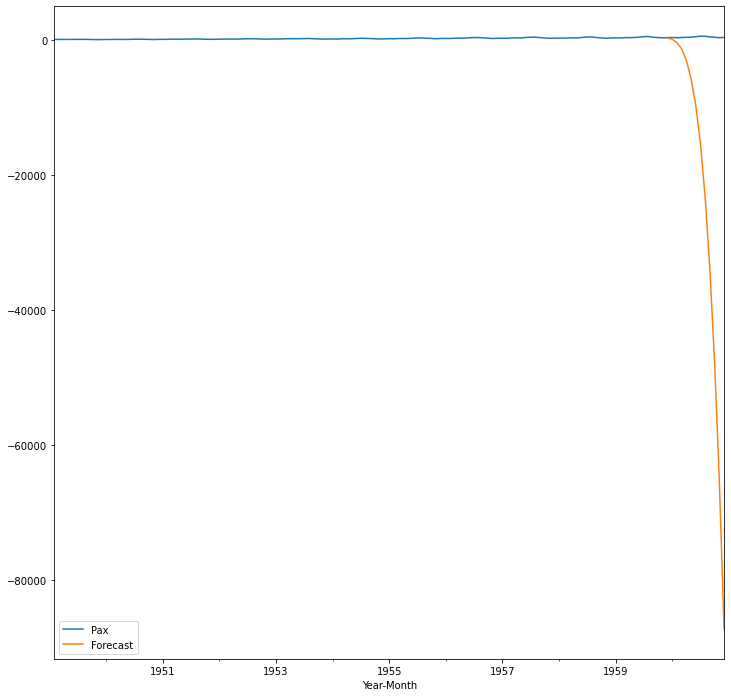

In [83]:
# Very important to set the parameters correctly....giving any value will result into disaster. 

model1=sm.tsa.statespace.SARIMAX(df['Pax'],order=(0,5,0),seasonal_order=(5,0,5,12))   
result = model1.fit()

df['Forecast'] = result.predict(start=130,end=144,dynamic=True)
# plt.figure(figsize=(12,12))
from pylab import rcParams
rcParams['figure.figsize'] =(12,12)
df[['Pax','Forecast']].plot()

# AUTOMATING THE SARIMAX MODEL

In [117]:
import itertools

p = q = d = range(0,2)
pdq = list(itertools.product(p,d,q))
seasonal_pdq=[(x[0],x[1],x[2],12) for x in pdq]

print(pdq[3],seasonal_pdq[7])
print(list(itertools.product(p,d,q)))
print("*******************************************************")
print(seasonal_pdq)

(0, 1, 1) (1, 1, 1, 12)
[(0, 0, 0), (0, 0, 1), (0, 1, 0), (0, 1, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)]
*******************************************************
[(0, 0, 0, 12), (0, 0, 1, 12), (0, 1, 0, 12), (0, 1, 1, 12), (1, 0, 0, 12), (1, 0, 1, 12), (1, 1, 0, 12), (1, 1, 1, 12)]


In [129]:
hld = []
for param_trend in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            model = sm.tsa.statespace.SARIMAX(df['Pax'],order=param_trend,seasonal_order=param_seasonal,
                                             enforce_stationarity=False,
                                             enforce_invertibility=False)
            result = model.fit()
            print("****************",param_trend,param_seasonal,result.aic)
            hld.append(result.aic)

        except:
            continue

C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.w

**************** (0, 0, 0) (0, 0, 0, 12) 2030.9986180694207
**************** (0, 0, 0) (0, 0, 1, 12) 1873.5027596942473
**************** (0, 0, 0) (0, 1, 0, 12) 1306.8396300670177


C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

**************** (0, 0, 0) (0, 1, 1, 12) 1147.1843419409352
**************** (0, 0, 0) (1, 0, 0, 12) 1110.827113238785
**************** (0, 0, 0) (1, 0, 1, 12) 1099.826476118154
**************** (0, 0, 0) (1, 1, 0, 12) 1099.743424351517


C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

**************** (0, 0, 0) (1, 1, 1, 12) 1025.7167916389453
**************** (0, 0, 1) (0, 0, 0, 12) 1834.0704384783508
**************** (0, 0, 1) (0, 0, 1, 12) 1557.1101766505365


C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

**************** (0, 0, 1) (0, 1, 0, 12) 1188.7823330273459
**************** (0, 0, 1) (0, 1, 1, 12) 1062.4370147387144


C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


**************** (0, 0, 1) (1, 0, 0, 12) 1063.595065455396
**************** (0, 0, 1) (1, 0, 1, 12) 1042.533467292146
**************** (0, 0, 1) (1, 1, 0, 12) 1049.9651962010344


C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


**************** (0, 0, 1) (1, 1, 1, 12) 976.9245836217043
**************** (0, 1, 0) (0, 0, 0, 12) 1395.9466416501446
**************** (0, 1, 0) (0, 0, 1, 12) 1186.4606578678438
**************** (0, 1, 0) (0, 1, 0, 12) 1017.6060377345044
**************** (0, 1, 0) (0, 1, 1, 12) 929.8029289703626


C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

**************** (0, 1, 0) (1, 0, 0, 12) 1024.4891597228832
**************** (0, 1, 0) (1, 0, 1, 12) 1008.3708410028847
**************** (0, 1, 0) (1, 1, 0, 12) 937.4208501044468
**************** (0, 1, 0) (1, 1, 1, 12) 931.8017701244981


C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

**************** (0, 1, 1) (0, 0, 0, 12) 1370.667809928335
**************** (0, 1, 1) (0, 0, 1, 12) 1173.5431260103396
**************** (0, 1, 1) (0, 1, 0, 12) 999.9764282654642
**************** (0, 1, 1) (0, 1, 1, 12) 913.6063284004151


C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

**************** (0, 1, 1) (1, 0, 0, 12) 1007.3896338485561
**************** (0, 1, 1) (1, 0, 1, 12) 978.476455920779


C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


**************** (0, 1, 1) (1, 1, 0, 12) 927.9119434247491
**************** (0, 1, 1) (1, 1, 1, 12) 913.238219921295


C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


**************** (1, 0, 0) (0, 0, 0, 12) 1406.9989246311334
**************** (1, 0, 0) (0, 0, 1, 12) 1197.2595765991264
**************** (1, 0, 0) (0, 1, 0, 12) 1022.9619733573654


C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

**************** (1, 0, 0) (0, 1, 1, 12) 937.3904545208214
**************** (1, 0, 0) (1, 0, 0, 12) 1010.5631395697139


C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


**************** (1, 0, 0) (1, 0, 1, 12) 1000.4167982716535
**************** (1, 0, 0) (1, 1, 0, 12) 937.0610905304236


C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


**************** (1, 0, 0) (1, 1, 1, 12) 938.4955561742272
**************** (1, 0, 1) (0, 0, 0, 12) 1381.5190996073907
**************** (1, 0, 1) (0, 0, 1, 12) 1184.0076589986165
**************** (1, 0, 1) (0, 1, 0, 12) 1007.4594920604849


C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

**************** (1, 0, 1) (0, 1, 1, 12) 921.4460842295019
**************** (1, 0, 1) (1, 0, 0, 12) 1002.8785023897173


C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


**************** (1, 0, 1) (1, 0, 1, 12) 982.6105913485183
**************** (1, 0, 1) (1, 1, 0, 12) 929.0061474706658


C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


**************** (1, 0, 1) (1, 1, 1, 12) 928.6991017078199
**************** (1, 1, 0) (0, 0, 0, 12) 1384.0174637553062
**************** (1, 1, 0) (0, 0, 1, 12) 1182.3219135036209
**************** (1, 1, 0) (0, 1, 0, 12) 1006.5530371461863


C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

**************** (1, 1, 0) (0, 1, 1, 12) 920.4245291952188
**************** (1, 1, 0) (1, 0, 0, 12) 1000.9218557843475
**************** (1, 1, 0) (1, 0, 1, 12) 988.8071492520294


C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

**************** (1, 1, 0) (1, 1, 0, 12) 919.8601252059133
**************** (1, 1, 0) (1, 1, 1, 12) 920.3649541533778
**************** (1, 1, 1) (0, 0, 0, 12) 1368.7162311234165


C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

**************** (1, 1, 1) (0, 0, 1, 12) 1175.5152029186102
**************** (1, 1, 1) (0, 1, 0, 12) 1001.7257303388335
**************** (1, 1, 1) (0, 1, 1, 12) 915.4066959470358
**************** (1, 1, 1) (1, 0, 0, 12) 1002.4854660676816
**************** (1, 1, 1) (1, 0, 1, 12) 980.4751388326138


C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


**************** (1, 1, 1) (1, 1, 0, 12) 921.8434902947598
**************** (1, 1, 1) (1, 1, 1, 12) 915.1400294721386


C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [130]:
min(hld)

913.238219921295

(0, 1, 1) (1, 1, 1, 12) 913.238219921295 --- this is the best parameter. 

# BEST MODEL

In [161]:
model = sm.tsa.statespace.SARIMAX(df['Pax'],order=(0,1,1),seasonal_order=(1,1,1,12),
                                  enforce_stationarity=False, 
                                  enforce_invertibility=False)

result=model.fit()
result.summary()

C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                Pax   No. Observations:                  143
Model:             SARIMAX(0, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -452.619
Date:                            Fri, 04 Aug 2023   AIC                            913.238
Time:                                    05:41:12   BIC                            924.253
Sample:                                02-01-1949   HQIC                           917.709
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3338      0.077     -4.342      0.000      -0.485      -0.183
ar.S.L12      -0.5693      0.277     -2.052      0.040      -1.113      -0.026
ma.S.L12       0.4175      0.330      1.267      0.205      -0.228       1.063
sigma2       141.0140     18.335      7.691      0.000     105.078     176.950
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 3.77
Prob(Q):                              0.95   Prob(JB):                         0.15
Heteroskedasticity (H):               2.21   Skew:                             0.13
Prob(H) (two-sided):                  0.02   Kurtosis:                         3.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Evaluation and further Predictions

In [155]:
df.head(1)

,Pax,1st Diff,2nd Diff,Seasonality,Forecast
Year-Month,,,,,
1949-02-01,118,NaN,NaN,NaN,NaN


In [156]:
df.tail(1)

,Pax,1st Diff,2nd Diff,Seasonality,Forecast
Year-Month,,,,,
1960-12-01,432,42.0,113.0,27.0,438.250604


Given data 1949-02-01 -- 1960-12-01
Ask is - to find prediction of 1961 - 1965

In [157]:
len(df)

143

In [158]:
df.tail(1)

,Pax,1st Diff,2nd Diff,Seasonality,Forecast
Year-Month,,,,,
1960-12-01,432,42.0,113.0,27.0,438.250604


In [159]:
# EVALUATION

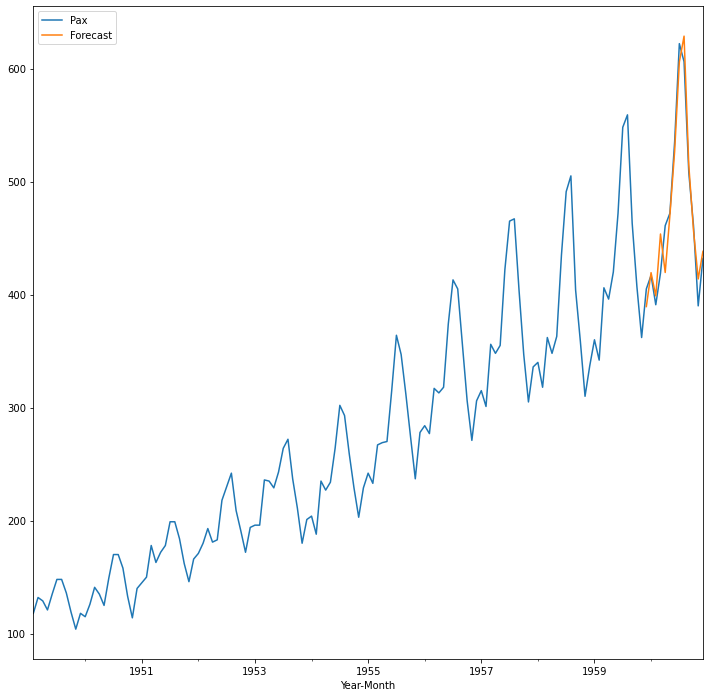

In [162]:
df['Forecast']=result.predict(start = 130,end=144,dynmaic=True)
df[['Pax','Forecast']].plot()
plt.show()

In [ ]:
# EVAlUATION

In [140]:
from pandas.tseries.offsets import DateOffset

In [142]:
future_date= [df.index[-1] + DateOffset(months = x) for x in range(0,61)]

In [143]:
future_date

[Timestamp('1960-12-01 00:00:00'),
 Timestamp('1961-01-01 00:00:00'),
 Timestamp('1961-02-01 00:00:00'),
 Timestamp('1961-03-01 00:00:00'),
 Timestamp('1961-04-01 00:00:00'),
 Timestamp('1961-05-01 00:00:00'),
 Timestamp('1961-06-01 00:00:00'),
 Timestamp('1961-07-01 00:00:00'),
 Timestamp('1961-08-01 00:00:00'),
 Timestamp('1961-09-01 00:00:00'),
 Timestamp('1961-10-01 00:00:00'),
 Timestamp('1961-11-01 00:00:00'),
 Timestamp('1961-12-01 00:00:00'),
 Timestamp('1962-01-01 00:00:00'),
 Timestamp('1962-02-01 00:00:00'),
 Timestamp('1962-03-01 00:00:00'),
 Timestamp('1962-04-01 00:00:00'),
 Timestamp('1962-05-01 00:00:00'),
 Timestamp('1962-06-01 00:00:00'),
 Timestamp('1962-07-01 00:00:00'),
 Timestamp('1962-08-01 00:00:00'),
 Timestamp('1962-09-01 00:00:00'),
 Timestamp('1962-10-01 00:00:00'),
 Timestamp('1962-11-01 00:00:00'),
 Timestamp('1962-12-01 00:00:00'),
 Timestamp('1963-01-01 00:00:00'),
 Timestamp('1963-02-01 00:00:00'),
 Timestamp('1963-03-01 00:00:00'),
 Timestamp('1963-04-

In [144]:
future_date_df = pd.DataFrame(index=future_date[1:],columns=df.columns)
future_date_df.tail()

,Pax,1st Diff,2nd Diff,Seasonality,Forecast
1965-08-01,NaN,NaN,NaN,NaN,NaN
1965-09-01,NaN,NaN,NaN,NaN,NaN
1965-10-01,NaN,NaN,NaN,NaN,NaN
1965-11-01,NaN,NaN,NaN,NaN,NaN
1965-12-01,NaN,NaN,NaN,NaN,NaN


In [145]:
future_pred = pd.concat([df,future_date_df])

In [146]:
future_pred.head(1)

,Pax,1st Diff,2nd Diff,Seasonality,Forecast
1949-02-01,118,NaN,NaN,NaN,NaN


In [147]:
future_pred.tail()

,Pax,1st Diff,2nd Diff,Seasonality,Forecast
1965-08-01,NaN,NaN,NaN,NaN,NaN
1965-09-01,NaN,NaN,NaN,NaN,NaN
1965-10-01,NaN,NaN,NaN,NaN,NaN
1965-11-01,NaN,NaN,NaN,NaN,NaN
1965-12-01,NaN,NaN,NaN,NaN,NaN


In [148]:
print(len(df))
print(len(future_pred))

143
203


# Predicting the FUture Data for 60 MOnths.

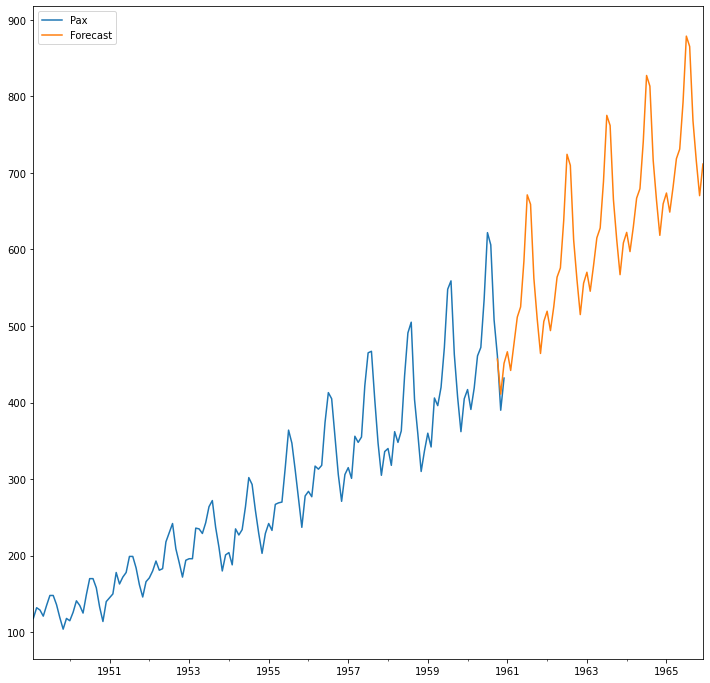

In [166]:
future_pred['Forecast']=  result.predict(start=140,end=204,dynamic=True)
future_pred[['Pax','Forecast']].plot()
plt.show()

In [167]:
future_pred.tail(60)

,Pax,1st Diff,2nd Diff,Seasonality,Forecast
1961-01-01,NaN,NaN,NaN,NaN,466.366152
1961-02-01,NaN,NaN,NaN,NaN,441.980835
1961-03-01,NaN,NaN,NaN,NaN,477.121593
1961-04-01,NaN,NaN,NaN,NaN,511.654217
1961-05-01,NaN,NaN,NaN,NaN,524.967107
1961-06-01,NaN,NaN,NaN,NaN,584.971549
1961-07-01,NaN,NaN,NaN,NaN,671.327239
1961-08-01,NaN,NaN,NaN,NaN,658.980891
1961-09-01,NaN,NaN,NaN,NaN,562.531131
1961-10-01,NaN,NaN,NaN,NaN,509.492324


In [168]:
future_pred.to_csv("Forecasting.csv")

# DONE